In [1]:
import pickle
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy as sc

In [2]:
dat=pd.read_csv("C:\\Users\\shreyas.raghavan\\Desktop\\Jackpot\\retail_data.csv")
dat.head()

,Transaction_Id,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value,Return_Flag,Mode_Payment,Retail_Qty
0,AVSI100002015000008,06-04-2015,10000,Urban,00DK04,88121.06,Returned,Cash,1
1,AVSI100002015000009,08-04-2015,10000,Urban,00DK04,88121.06,Returned,Cash,1
2,AVSI100002015000010,09-04-2015,10000,Urban,00DH15,72026.80,Returned,Cash,1
3,AVSI100002015000011,10-04-2015,10000,Urban,00DH15,72026.80,Returned,Cash,1
4,AVSI100002015000012,13-04-2015,10000,Urban,00DU10,35727.06,Returned,Cash,1


In [3]:
    def univariate(train):

        '''

            this function is for univariate analysis,

        '''

        #if 

        x = [x for x in train.columns if train[x].dtypes != 'object']

        data = train[x]

        #y = data.describe()

#         evcount = target.value_counts()

#         evratio = evcount[event]/target.count()

        def Range(y):

            mi = np.min(y)

            ma = np.max(y)

            rng = ma-mi

            return rng

        Rnge = data.apply(Range)

        def iqr(y):

            x25 = np.percentile(y,25)

            x75 = np.percentile(y,75)

            Iqr = x75 - x25

            return Iqr

           

        iQr = data.apply(iqr)

        def Skew(y):

            d = skew(y)

            return d

        skewness = data.apply(Skew)

        def Kurt(y):

            d = kurtosis(y)

            return d

        Kurtosis = data.apply(Kurt)

       

        mean = data.apply(np.mean)

        stdv = data.apply(np.std)

        median = data.apply(np.median)

        missingno = data.isnull().sum()

        def outlier(y):

            q1 = np.percentile(y,25)

            q3 = np.percentile(y,75)

            iqr = q3-q1

            outlier = ((y > (q3 +1.5*iqr)) |(y <(q1-1.5*iqr ))).sum()

            return outlier

        Q1 = data.quantile(.25) 
        
        p1=data.quantile(0.01)
        p3=data.quantile(0.99)

        Q3 = data.quantile(.75)

        out = data.apply(outlier)
         
        count=train.shape[0]
        
        missingper=(missingno/count)*100

        Frame = [Rnge,Q1,Q3,p1,p3,iQr,skewness,Kurtosis,mean,stdv,median,missingno,out,missingper]

        unistat = pd.concat(Frame,axis =1)

        unistat.columns = ['Range','Q1','Q3','p1','p99','IQR','Skewness','Kurtosis','mean','stdv','median','MissingValue','outlier','Missing_perc']

        l=[]
        
        for i in missingper:
            if i>99:
                l.append(1)
            else:
                l.append(0)
                
        unistat['Missing_Criteria']=l
        
        unistat=unistat[['MissingValue','Missing_perc','mean','median','stdv','p1','p99','Range','Q1','Q3','IQR','outlier','Skewness','Kurtosis']]
        z = [x for x in train.columns if train[x].dtypes == 'object']

        dat = train[z]

        cat = {}

        for i in z:

            cat[i]= dat[i].value_counts()
        
        data={'catdist':cat , 'unistat':unistat}
        k=0

        engine = 'xlsxwriter'

        writer = pd.ExcelWriter('univariates_bivariates_test.xlsx',engine=engine)

        uni=data['unistat']

        k=len(uni)+1

        uni.to_excel(writer,sheet_name='univariates',startrow=0,startcol=0,index=True)

        for i in data['catdist']:
          sum1=train.shape[0]
          report_df = pd.DataFrame()
          print(data['catdist'][i].index)
          report_df[i] = list(data['catdist'][i].index)
          report_df["Numbers"] = data['catdist'][i].values
          l1=[]
          for j in data['catdist'][i]:
              l1.append(j/sum1)
          report_df["perc"] = l1
#              print('reprt_df is')
#              print(report_df)
          report_df.to_excel(writer,sheet_name='univariates',startrow=k+1,startcol=0,index=True)

          k=len(data['catdist'][i])+2+k

        writer.close()

In [4]:
univariate(dat[tr])

NameError: name 'univariate' is not defined

In [3]:
##Creating Derived Variables
ToTNumberSold=  pd.DataFrame((dat.groupby(['Retailer_ID'])['Transaction_Id'].size()))
#TotalNumberofbikessoldperretailer
TotalRetailVal =  pd.DataFrame((dat.groupby(['Retailer_ID'])['Retal_Value'].sum()))




In [4]:
ToTNumberSold.to_csv('C:\\Users\\shreyas.raghavan\\Documents\\Personalization\\ToTNumberSold.csv')
TotalRetailVal.to_csv('C:\\Users\\shreyas.raghavan\\Documents\\Personalization\\TotalRetailVal.csv')

In [5]:
ToTNumberSold=pd.read_csv("C:\\Users\\shreyas.raghavan\\Documents\\Personalization\\ToTNumberSold.csv")
Numbersoldperday=pd.read_csv("C:\\Users\\shreyas.raghavan\\Documents\\Personalization\\Numbersoldperday.csv")
Numbertransperday=pd.read_csv("C:\\Users\\shreyas.raghavan\\Documents\\Personalization\\Numbertransperday.csv")
TotalRetailVal=pd.read_csv("C:\\Users\\shreyas.raghavan\\Documents\\Personalization\\TotalRetailVal.csv")


In [6]:
#result = Numbersoldperday.combine_first(Numbertransperday)
#result = pd.merge(ToTNumberSold, TotalRetailVal, on='Retailer_ID')
a=dat.merge(TotalRetailVal, on='Retailer_ID', how='outer', indicator=True)


In [7]:
b=a.merge(ToTNumberSold, on='Retailer_ID', how='outer', indicator= False)
list(b.columns.values)
b.head()


,Transaction_Id_x,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value_x,Return_Flag,Mode_Payment,Retail_Qty,Retal_Value_y,_merge,Transaction_Id_y
0,AVSI100002015000008,06-04-2015,10000,Urban,00DK04,88121.06,Returned,Cash,1,9.002821e+08,both,12113
1,AVSI100002015000009,08-04-2015,10000,Urban,00DK04,88121.06,Returned,Cash,1,9.002821e+08,both,12113
2,AVSI100002015000010,09-04-2015,10000,Urban,00DH15,72026.80,Returned,Cash,1,9.002821e+08,both,12113
3,AVSI100002015000011,10-04-2015,10000,Urban,00DH15,72026.80,Returned,Cash,1,9.002821e+08,both,12113
4,AVSI100002015000012,13-04-2015,10000,Urban,00DU10,35727.06,Returned,Cash,1,9.002821e+08,both,12113


In [8]:
#Question 1
tr=list(b.columns)
tr.remove('Retailer_ID')
tr.remove('Retal_Value_x')
tr.remove('Retail_Qty')
tr.remove('Retal_Value_y')
tr.remove('Transaction_Id_y')
tr.remove('Transaction_Id_x')
tr.remove('Transaction_Date')
tr.remove('_merge')
tr.remove('Product_ID')
Temp=b[tr]
Temp

,Location_Type,Return_Flag,Mode_Payment
0,Urban,Returned,Cash
1,Urban,Returned,Cash
2,Urban,Returned,Cash
3,Urban,Returned,Cash
4,Urban,Returned,Cash
5,Urban,Returned,Cash
6,Urban,Returned,Cash
7,Urban,Returned,Cash
8,Urban,Returned,Cash
9,Urban,Returned,Cash


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
features=list(b.columns)

In [10]:
#Creating Dummies
cat_df=pd.get_dummies(Temp,drop_first=True)

In [11]:
features=list(b.columns)
features.remove('_merge')
features.remove('Mode_Payment')
features.remove('Location_Type')
features.remove('Transaction_Id_x')
features.remove('Product_ID')
features.remove('Return_Flag')
features.remove('Transaction_Date')
X=b[features]
X

,Retailer_ID,Retal_Value_x,Retail_Qty,Retal_Value_y,Transaction_Id_y
0,10000,88121.06,1,9.002821e+08,12113
1,10000,88121.06,1,9.002821e+08,12113
2,10000,72026.80,1,9.002821e+08,12113
3,10000,72026.80,1,9.002821e+08,12113
4,10000,35727.06,1,9.002821e+08,12113
5,10000,62366.80,1,9.002821e+08,12113
6,10000,41876.10,1,9.002821e+08,12113
7,10000,52306.60,1,9.002821e+08,12113
8,10000,88121.06,1,9.002821e+08,12113
9,10000,82904.66,1,9.002821e+08,12113


In [12]:
whole_df=pd.concat([X,cat_df],axis=1)
whole_df.head()

,Retailer_ID,Retal_Value_x,Retail_Qty,Retal_Value_y,Transaction_Id_y,Location_Type_Urban,Mode_Payment_Finance
0,10000,88121.06,1,9.002821e+08,12113,1,0
1,10000,88121.06,1,9.002821e+08,12113,1,0
2,10000,72026.80,1,9.002821e+08,12113,1,0
3,10000,72026.80,1,9.002821e+08,12113,1,0
4,10000,35727.06,1,9.002821e+08,12113,1,0


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(whole_df)
y_kmeans = kmeans.predict(whole_df)
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

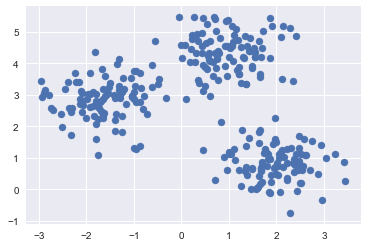

In [14]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [15]:
centroids = kmeans.cluster_centers_
centroids

array([[  1.03030621e+04,   6.94485139e+04,   1.00000000e+00,
          1.55005282e+09,   2.23827749e+04,   9.37691683e-01,
          3.28623940e-01],
       [  1.03944863e+04,   5.80016989e+04,   1.00000000e+00,
          8.91734419e+08,   1.55743854e+04,   6.66724036e-01,
          3.21560287e-01],
       [  1.03959288e+04,   5.39005853e+04,   1.00000000e+00,
          4.43588447e+08,   8.25187374e+03,   6.57257313e-01,
          3.40453565e-01]])

In [16]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = whole_df.index.values
cluster_map['cluster'] = kmeans.labels_

In [17]:
centers = np.array(kmeans.cluster_centers_)
centers

array([[  1.03030621e+04,   6.94485139e+04,   1.00000000e+00,
          1.55005282e+09,   2.23827749e+04,   9.37691683e-01,
          3.28623940e-01],
       [  1.03944863e+04,   5.80016989e+04,   1.00000000e+00,
          8.91734419e+08,   1.55743854e+04,   6.66724036e-01,
          3.21560287e-01],
       [  1.03959288e+04,   5.39005853e+04,   1.00000000e+00,
          4.43588447e+08,   8.25187374e+03,   6.57257313e-01,
          3.40453565e-01]])

In [18]:
from scipy.spatial.distance import cdist
min_dist = np.min(cdist(whole_df.as_matrix(), kmeans.cluster_centers_, 'euclidean'), axis=1)
Y = pd.DataFrame(min_dist, index=whole_df.index, columns=['Center_euclidean_dist'])
Z = pd.DataFrame(y_kmeans, index=whole_df.index, columns=['cluster_ID'])
PAP = pd.concat([Y,Z], axis=1)
grouped = PAP.groupby(['cluster_ID'])
out=grouped.idxmin()
out['Center_euclidean_dist']

cluster_ID
0    286710
1    401524
2    454099
Name: Center_euclidean_dist, dtype: int64

In [19]:
f=pd.DataFrame(b.loc[401524]).transpose()
g=pd.DataFrame(b.loc[454099]).transpose()
h=pd.DataFrame(b.loc[286710]).transpose()
i=f.append(g)
j=i.append(h)
j

,Transaction_Id_x,Transaction_Date,Retailer_ID,Location_Type,Product_ID,Retal_Value_x,Return_Flag,Mode_Payment,Retail_Qty,Retal_Value_y,_merge,Transaction_Id_y
401524,VSI104481701258,06-03-2018,10448,Rural,00JH05,58000,Returned,Cash,1,8.93352e+08,both,17305
454099,AVSI105841800099,22-06-2018,10584,Urban,00JZ35,53900.8,Returned,Cash,1,4.43995e+08,both,7826
286710,AVSI103612015000180,05-05-2015,10361,Urban,00DH15,70144.8,Returned,Cash,1,1.56141e+09,both,25190


In [20]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X )
  cluster_errors.append( clusters.inertia_ )

In [21]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [22]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,1517.039117,1
1,655.339275,2
2,212.355503,3
3,182.817200,4
4,158.194164,5
5,137.125163,6
6,119.596553,7
7,103.607372,8
8,90.045259,9
9,83.084616,10


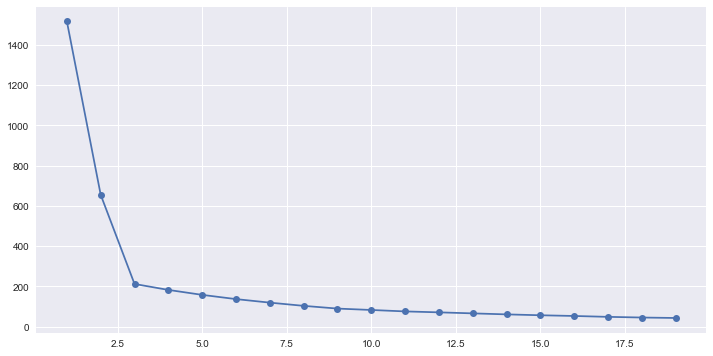

In [23]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [24]:
#By looking at the above results ,the optimal number of clusters is 3-4
# Taking 3 clusters : The cluster  401524 consists of rural retail branches . It has a moderate amount of bike sold
                    # The 454099 cluster consists of urban retailers with very low sales
                     # The 286710 cluster consists of urban retailers with high sales 

In [109]:
#Question 2 and 3 Choosing the centroid values as retailers exhibiting proper characteristics
# USing Moving Average and ARIMA to forecast . Choosing based on RMSE Value
#10448
#10584
#10361

one=b[b['Retailer_ID'] == 10448 ]
two=b[b['Retailer_ID'] == 10584 ]
three=b[b['Retailer_ID'] == 10361 ]
o=list(one)
o.remove('_merge')
o.remove('Mode_Payment')
o.remove('Location_Type')
o.remove('Transaction_Id_x')
o.remove('Product_ID')
o.remove('Return_Flag')
Uni=one[o]
Uni
p=list(two)
p.remove('_merge')
p.remove('Mode_Payment')
p.remove('Location_Type')
p.remove('Transaction_Id_x')
p.remove('Product_ID')
p.remove('Return_Flag')
bi=two[p]
bi
q=list(three)
q.remove('_merge')
q.remove('Mode_Payment')
q.remove('Location_Type')
q.remove('Transaction_Id_x')
q.remove('Product_ID')
q.remove('Return_Flag')
tri=three[q]

tri


,Transaction_Date,Retailer_ID,Retal_Value_x,Retail_Qty,Retal_Value_y,Transaction_Id_y
284709,01-04-2015,10361,51173.48,1,1.561407e+09,25190
284710,01-04-2015,10361,44466.08,1,1.561407e+09,25190
284711,01-04-2015,10361,61511.69,1,1.561407e+09,25190
284712,02-04-2015,10361,70598.41,1,1.561407e+09,25190
284713,02-04-2015,10361,51173.48,1,1.561407e+09,25190
284714,02-04-2015,10361,44466.08,1,1.561407e+09,25190
284715,02-04-2015,10361,40963.52,1,1.561407e+09,25190
284716,02-04-2015,10361,70598.41,1,1.561407e+09,25190
284717,02-04-2015,10361,70598.41,1,1.561407e+09,25190
284718,02-04-2015,10361,70598.41,1,1.561407e+09,25190


In [164]:
Uni['Transaction_Date'] =  pd.to_datetime(Uni['Transaction_Date'])
bi['Transaction_Date'] =  pd.to_datetime(bi['Transaction_Date'])
tri['Transaction_Date'] =  pd.to_datetime(tri['Transaction_Date'])

In [128]:
Uni.set_index("Transaction_Date", inplace = True) 
bi.set_index("Transaction_Date", inplace = True) 
tri.set_index("Transaction_Date", inplace = True) 

In [165]:
ts1=Uni['Retal_Value_x']
ts2=bi['Retal_Value_x']
ts3=tri['Retal_Value_x']

In [ ]:
ts3_log=np.log(ts3)
ts2_log=np.log(ts2)
ts1_log=np.log(ts1)

C:\Users\shreyas.raghavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


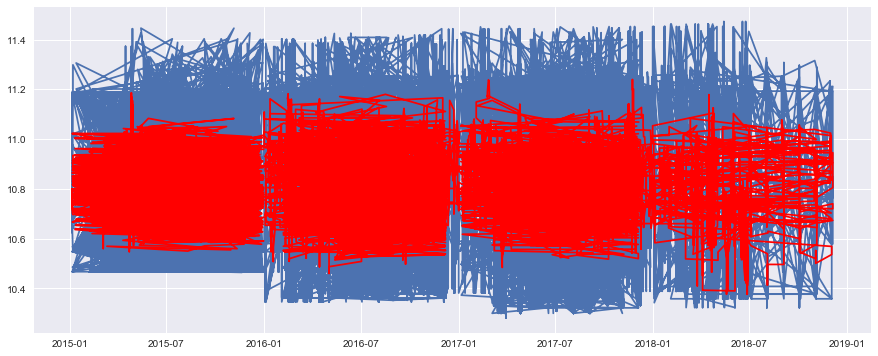

In [134]:
moving_avg = pd.rolling_mean(ts1_log,12)
plt.plot(ts1_log)
plt.plot(moving_avg, color='red')

C:\Users\shreyas.raghavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


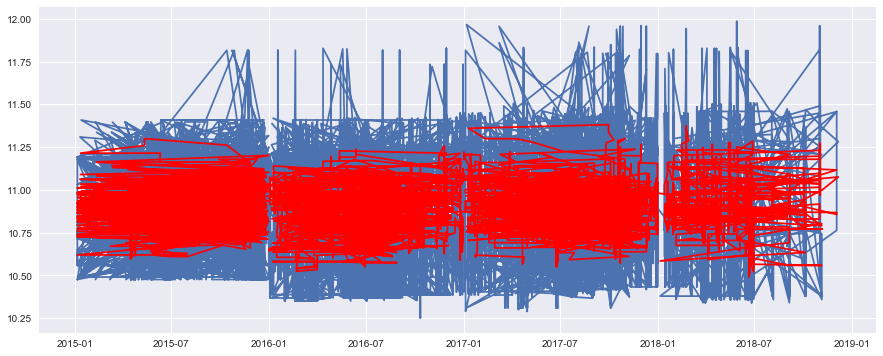

In [135]:
moving_avg = pd.rolling_mean(ts2_log,12)
plt.plot(ts2_log)
plt.plot(moving_avg, color='red')

C:\Users\shreyas.raghavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


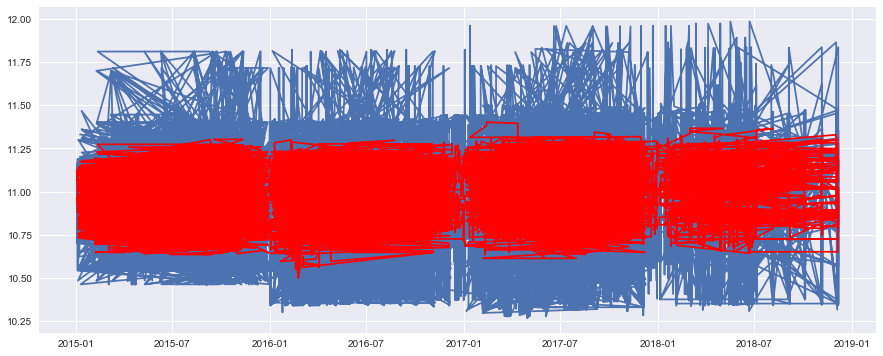

In [136]:
moving_avg = pd.rolling_mean(ts3_log,12)
plt.plot(ts3_log)
plt.plot(moving_avg, color='red')



In [161]:
#Moving Average
model = ARIMA(ts1_log, order=(0, 1, 2))  
results_MA1 = model.fit(disp=-1)  
model = ARIMA(ts2_log, order=(0, 1, 2))  
results_MA2 = model.fit(disp=-1)  
model = ARIMA(ts3_log, order=(0, 1, 2))  
results_MA3 = model.fit(disp=-1)  


In [162]:
predictions_ARIMA_diff = pd.Series(results_MA1.fittedvalues, copy=True)
predictions_ARIMA_diff = pd.Series(results_MA2.fittedvalues, copy=True)
predictions_ARIMA_diff = pd.Series(results_MA3.fittedvalues, copy=True)


Transaction_Date
2015-01-04    0.000012
2015-01-04    0.068997
2015-02-04   -0.165498
2015-02-04   -0.225624
2015-02-04    0.071353
2015-02-04    0.174202
2015-02-04    0.218149
2015-02-04   -0.275618
2015-02-04   -0.244838
2015-02-04   -0.219996
2015-02-04    0.032072
2015-02-04    0.210649
2015-02-04    0.122805
2015-02-04   -0.234704
2015-02-04    0.203655
2015-02-04    0.332075
2015-02-04    0.315225
2015-02-04    0.150490
2015-02-04    0.288662
2015-03-04    0.126207
2015-03-04    0.119675
2015-03-04    0.261450
2015-03-04    0.324290
2015-03-04    0.233988
2015-04-04    0.152028
2015-04-04   -0.365841
2015-04-04   -0.047963
2015-04-04    0.086409
2015-06-04    0.232225
2015-06-04    0.073885
                ...   
2018-06-14   -0.060072
2018-06-14    0.741116
2018-06-18   -0.076451
2018-06-14   -0.074827
2018-06-14   -0.134278
2018-06-28   -0.319600
2018-06-30    0.737771
2018-06-15    0.345757
2018-06-15   -0.149499
2018-06-15   -0.334582
2018-06-15   -0.326445
2018-06-15    0.3

Text(0.5,1,'RSS: nan')

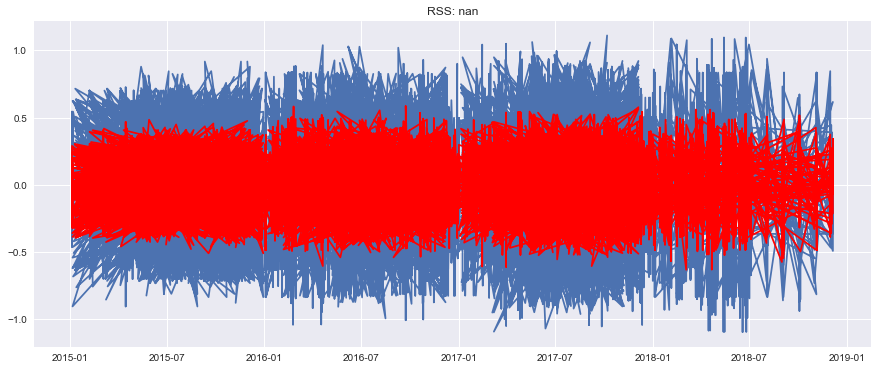

In [138]:
##ARIMA Model

#First Cluster Forecast
from statsmodels.tsa.arima_model import ARIMA
ts1_log_diff = ts1_log - ts1_log.shift()
model = ARIMA(ts1_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts1_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts1_log_diff)**2))

In [152]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)

print (predictions_ARIMA_diff)

Transaction_Date
2015-01-04    0.000017
2015-01-04    0.000025
2015-01-04   -0.316810
2015-01-04    0.110254
2015-01-04    0.182727
2015-01-04   -0.105607
2015-01-04   -0.064954
2015-01-04    0.129595
2015-01-04    0.017321
2015-01-04   -0.051455
2015-01-04   -0.255374
2015-02-04    0.066138
2015-02-04    0.223531
2015-02-04    0.109394
2015-02-04    0.022290
2015-02-04   -0.119604
2015-02-04   -0.301556
2015-02-04   -0.121141
2015-02-04    0.000032
2015-02-04    0.187311
2015-02-04    0.175833
2015-02-04    0.041094
2015-02-04   -0.027531
2015-02-04   -0.013793
2015-03-04    0.000032
2015-03-04    0.166679
2015-03-04    0.083619
2015-03-04    0.000032
2015-03-04    0.000032
2015-03-04   -0.046979
                ...   
2018-05-25    0.242240
2018-05-25   -0.242176
2018-05-28    0.242240
2018-05-28   -0.242176
2018-05-28    0.014782
2018-05-29    0.357146
2018-05-30   -0.113337
2018-05-31   -0.372476
2018-05-31    0.128833
2018-05-31    0.044111
2018-01-06   -0.042873
2018-03-06    0.3

Text(0.5,1,'RSS: nan')

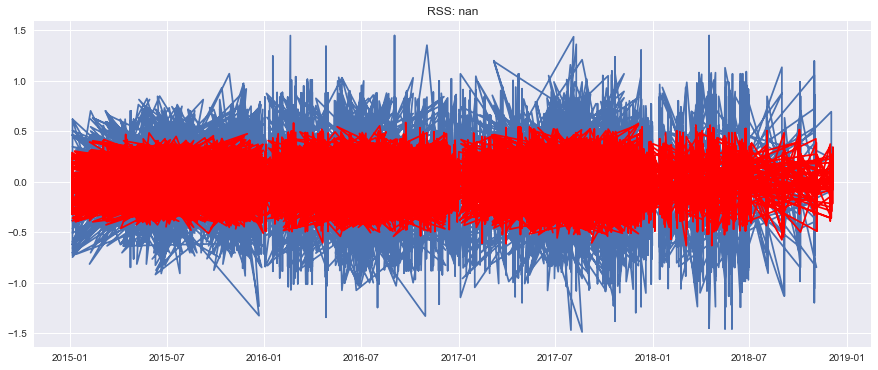

In [153]:
#Second Cluster Forecast
from statsmodels.tsa.arima_model import ARIMA
ts2_log_diff = ts2_log - ts2_log.shift()
model = ARIMA(ts1_log, order=(2, 1, 0))  
results_AR2 = model.fit(disp=-1)  
plt.plot(ts2_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR2.fittedvalues-ts2_log_diff)**2))

In [154]:
predictions_ARIMA_diff = pd.Series(results_AR2.fittedvalues, copy=True)

print (predictions_ARIMA_diff)

Transaction_Date
2015-01-04    0.000017
2015-01-04    0.000025
2015-01-04   -0.316810
2015-01-04    0.110254
2015-01-04    0.182727
2015-01-04   -0.105607
2015-01-04   -0.064954
2015-01-04    0.129595
2015-01-04    0.017321
2015-01-04   -0.051455
2015-01-04   -0.255374
2015-02-04    0.066138
2015-02-04    0.223531
2015-02-04    0.109394
2015-02-04    0.022290
2015-02-04   -0.119604
2015-02-04   -0.301556
2015-02-04   -0.121141
2015-02-04    0.000032
2015-02-04    0.187311
2015-02-04    0.175833
2015-02-04    0.041094
2015-02-04   -0.027531
2015-02-04   -0.013793
2015-03-04    0.000032
2015-03-04    0.166679
2015-03-04    0.083619
2015-03-04    0.000032
2015-03-04    0.000032
2015-03-04   -0.046979
                ...   
2018-05-25    0.242240
2018-05-25   -0.242176
2018-05-28    0.242240
2018-05-28   -0.242176
2018-05-28    0.014782
2018-05-29    0.357146
2018-05-30   -0.113337
2018-05-31   -0.372476
2018-05-31    0.128833
2018-05-31    0.044111
2018-01-06   -0.042873
2018-03-06    0.3

Text(0.5,1,'RSS: nan')

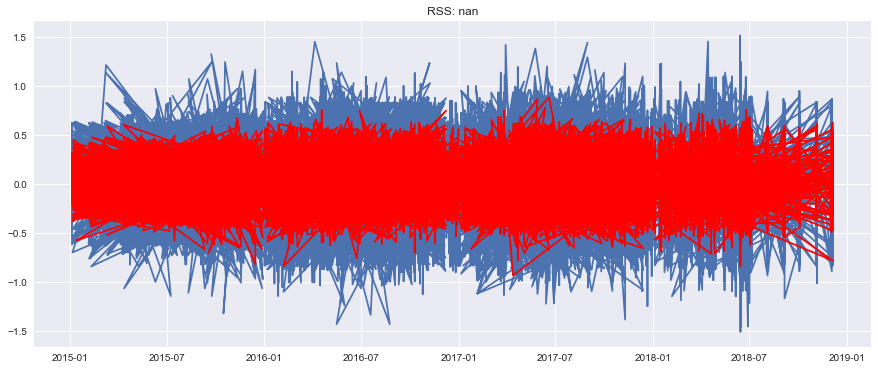

In [156]:
#Third Cluster Forecast
from statsmodels.tsa.arima_model import ARIMA
ts3_log_diff = ts3_log - ts3_log.shift()
model = ARIMA(ts3_log, order=(2, 1, 0))  
results_AR3 = model.fit(disp=-1)  
plt.plot(ts3_log_diff)
plt.plot(results_AR3.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR3.fittedvalues-ts3_log_diff)**2))

In [157]:
predictions_ARIMA_diff = pd.Series(results_AR3.fittedvalues, copy=True)

print (predictions_ARIMA_diff)

Transaction_Date
2015-01-04    0.000016
2015-01-04    0.069780
2015-02-04   -0.167877
2015-02-04   -0.197879
2015-02-04    0.167045
2015-02-04    0.198841
2015-02-04    0.100502
2015-02-04   -0.332258
2015-02-04   -0.179379
2015-02-04    0.000033
2015-02-04    0.171885
2015-02-04    0.219156
2015-02-04    0.014531
2015-02-04   -0.279069
2015-02-04    0.178831
2015-02-04    0.254286
2015-02-04    0.053506
2015-02-04   -0.103154
2015-02-04    0.052350
2015-03-04   -0.052285
2015-03-04   -0.052137
2015-03-04    0.104520
2015-03-04    0.105344
2015-03-04   -0.026576
2015-04-04   -0.076826
2015-04-04   -0.384428
2015-04-04    0.033046
2015-04-04    0.198841
2015-06-04    0.150827
2015-06-04   -0.052285
                ...   
2018-06-14    0.000033
2018-06-14    0.551032
2018-06-18   -0.275858
2018-06-14   -0.275077
2018-06-14   -0.042201
2018-06-28   -0.150999
2018-06-30    0.658330
2018-06-15    0.103205
2018-06-15   -0.464066
2018-06-15   -0.297339
2018-06-15   -0.064848
2018-06-15    0.4

In [ ]:
#Arima Model Produces forecast with least error .
#The order is as follows : Mean< Mob=ving Average< Simple exponential< ARIMA

In [193]:
#Question 4

DH19=b[b['Product_ID'] == '00DH19']
DU16=b[b['Product_ID'] == '00DU16']

In [194]:
DH19['Transaction_Date'] =  pd.to_datetime(DH19['Transaction_Date'])

C:\Users\shreyas.raghavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
DU16['Transaction_Date'] =  pd.to_datetime(DU16['Transaction_Date'])

C:\Users\shreyas.raghavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [197]:
Z=list(DH19)
Z.remove('_merge')
Z.remove('Mode_Payment')
Z.remove('Location_Type')
Z.remove('Transaction_Id_x')
Z.remove('Product_ID')
Z.remove('Return_Flag')
DH19=DH19[Z]

In [198]:
K=list(DU16)
K.remove('_merge')
K.remove('Mode_Payment')
K.remove('Location_Type')
K.remove('Transaction_Id_x')
K.remove('Product_ID')
K.remove('Return_Flag')
DU16=DU16[K]

In [199]:
DH19.set_index("Transaction_Date", inplace = True) 
DU16.set_index("Transaction_Date", inplace = True) 

In [200]:
ts0=DH19['Retal_Value_x']
ts=DU16['Retal_Value_x']
ts0_log=np.log(ts0)
ts_log=np.log(ts)

Text(0.5,1,'RSS: nan')

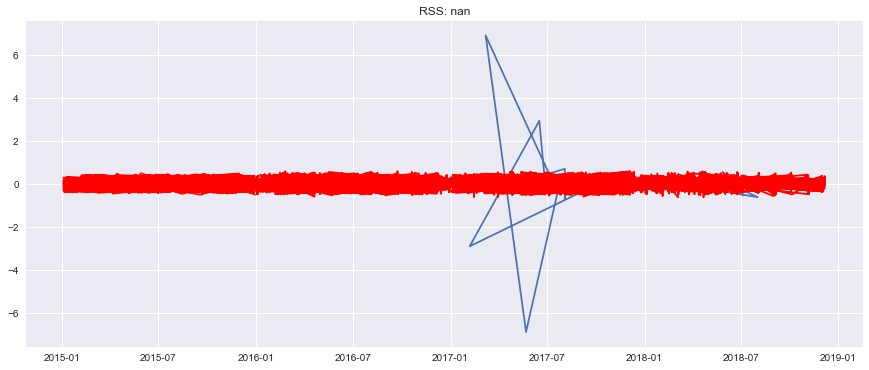

In [201]:
from statsmodels.tsa.arima_model import ARIMA
ts0_log_diff = ts0_log - ts0_log.shift()
model = ARIMA(ts1_log, order=(2, 1, 0))  
results_AR0 = model.fit(disp=-1)  
plt.plot(ts0_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR0.fittedvalues-ts0_log_diff)**2))

Text(0.5,1,'RSS: nan')

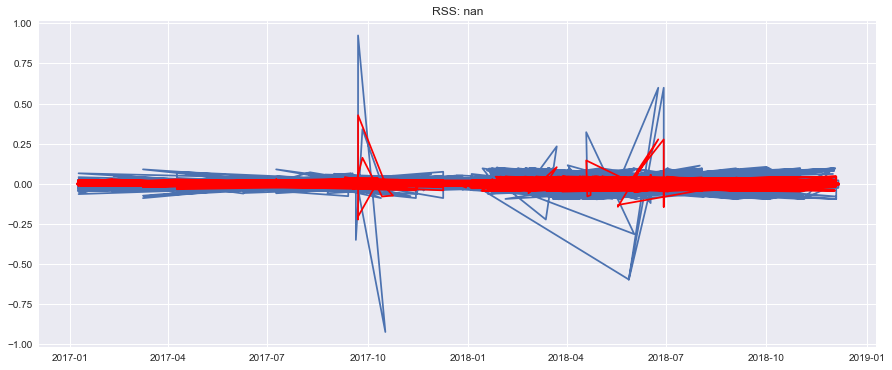

In [202]:
from statsmodels.tsa.arima_model import ARIMA
ts_log_diff = ts_log - ts_log.shift()
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [207]:
predictions_ARIMA_diff = pd.Series(results_AR0.fittedvalues, copy=True)

finDH19=pd.DataFrame(predictions_ARIMA_diff)
finDH19.loc['2018-06-30':'2018-08-31']

,0
Transaction_Date,
2018-07-02,0.000032
2018-07-01,0.033087
2018-07-01,0.094119
2018-08-04,-0.387859
2018-08-04,-0.204372
2018-08-04,0.056391
2018-08-04,-0.033321
2018-08-04,0.120705
2018-08-04,0.504562


In [208]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)

finDU16=pd.DataFrame(predictions_ARIMA_diff)
finDU16.loc['2018-06-30':'2018-08-31']

,0
Transaction_Date,
2018-08-02,-0.000004
2018-07-05,-0.000004
2018-06-30,-0.000004
2018-06-30,-0.000004
2018-08-06,-0.000004
2018-07-03,-0.000004
2018-07-05,-0.000004
2018-06-30,-0.000004
2018-06-30,-0.000004
